# Root bracketing 

Looking for a solution:

$$\Large 
f(x) \ = \ 0
$$

<br>

* Two interval endpoints $x \in [\, a\, , \, b \, ]$

$$\Large
a < x < b
$$

<br>

* *Asuuming a single root exists in the interval*, one of two things happens:

$$\Large
f(a)\ < \ 0, \qquad \text{and} \qquad  0  \ < \ f(b)  
$$

<br>

$$\Large
\text{or}
$$

<br>

$$\Large
0 \ < \ f(a), \qquad \text{and} \qquad f(b) \ < \ 0
$$


* If we have one midpoint (a root candidate), 

$$\Large
a < c < b
$$

<br>

*  
$$\Large 
\text{If}: \qquad \text{sign}(\,f(a)\,) \ = \  \text{sign}(\, f(c)\, )
$$

<br>

$$\Large
[\,a,\,b\,] \to [\,c,\,b\,]
$$

*  

$$\Large 
\text{If}: \qquad \text{sign}(\,f(b)\,) \ = \  \text{sign}(\, f(c)\, )
$$

<br>

$$\Large
 [\,a,\,b\,] \to [\,a,\,c\,]
$$

<br>

$$\large
\text{sign}(x) \ = \ \text{sign}(y) \qquad \iff \quad x \, y \ > \  0.
$$


<br>

### Midpoint rule

$$\Large 
c = \frac{a+b}{2}
$$


<br>


### *Regula falsi* (false position)

$$\Large
c = \frac{a\, f(b) - b \, f(a)}{f(b) - f(a)}
$$

<br>

In [111]:
import numpy as np
import matplotlib.pyplot as plt

def bracket_plot(x, y):
    
    plt.plot(x,y,color='blue')
        
    a, b = x[0], x[-1]

    # midpoint 
    c = (a + b) / 2
    
    plt.plot(c + 0 * x, y, color='red')
    
    fa, fb = y[0], y[-1]

    l = ( fa * (b - x) + fb * (x - a) ) / (b - a)
    
    plt.plot( x, l, color='green' )

    # false-position 
    c = ( a * fb - b * fa ) / ( fb - fa )
    
    plt.plot(c + 0 * x, f(x) , color='green')
    
    plt.legend(['f(x)', 'midpoint', 'false position'])
    
    plt.plot(x, 0 * x, color='black')

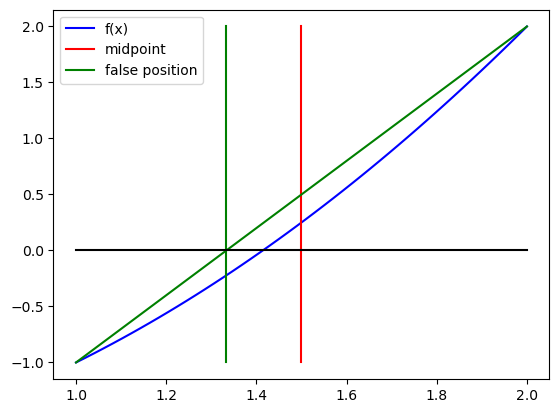

In [77]:
def f(x): 
    return x**2 - 2

x = np.linspace(1,2)
y = f(x)

bracket_plot(x,y)

You might wonder if the true root is always between the midpoint and false-position? If so, it would be another improved method. So maybe just asking the question gives you the answer based on the *"Principle of boring results"*, i.e., if it existed we would already be talking about it. 

Indeed:

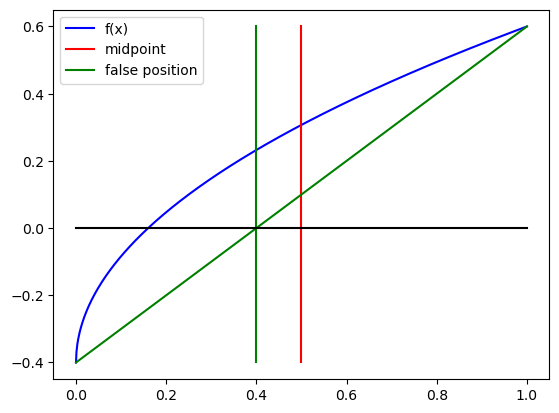

In [118]:
def f(x): 
    return x**0.5 - 0.4

x = np.linspace(0,1,1000)
y = f(x)

bracket_plot(x,y)

Where things land depends on the *curvature* of $f(x)$. It seems if we want to do better, we need more information.

<br> 
<br>

### A True Fact:

$$\Large
\frac{a\, f(b) - b \, f(a)}{f(b) - f(a)} \quad = \quad \frac{a+b}{2} \ - \  \frac{\frac{f(a)+f(b)}{2}}{ \frac{f(b)-f(a)}{b-a}}
$$

<br>

<br>

<br>

You might think you could do better (using only $a,b$ $f(a),f(b)$ as information).

You might (e.g.) try to use a *weighted average* that biases $a$ or $b$ depending on how close $f(a)$ or $f(b)$ is to a root.

$$\large
\frac{x+y}{2} \quad \to \quad \alpha \, x + \beta\, y \qquad \text{where} \qquad \alpha + \beta \ = \ 1
$$

Then perhaps 

$$\large
\alpha \ = \ \frac{|f(a)|^{-1}}{|f(b)|^{-1} + |f(b)|^{-1}}, \qquad \qquad \beta \ = \ \frac{|f(b)|^{-1}}{|f(b)|^{-1} + |f(b)|^{-1}}.
$$


You'll find if you do this, then you'll get back the exact false-position update. 

<br>

<br>

<br>

### Some code 


Let's impliment the two methods described above.


In [153]:
def update_bracket(a,b,c,fa,fb,fc):
    if fa * fc > 0:
        return c, b
    return a, c

In [154]:
def midpoint(a,b):
    return (a + b)/2 

In [121]:
def false_position(a, b, fa, fb):
    return (a * fb - b * fa) / (fb - fa) 

In [151]:
def find_root(a, b, f, method = 'midpoint', niterations = 100):

    if method == 'brute_force':
        x = np.linspace(a,b,niterations)
        return x[np.argmin(np.abs(f(x)))]
    
    for _ in range(niterations):
    
        fa = f(a)
        fb = f(b)
    
        if method == 'midpoint':
            c = midpoint(a,b)
        else:
            c = false_position(a, b, fa, fb)

        fc = f(c)
        
        a, b = update_bracket(a, b, c, fa, fb, fc)

    return c

In [152]:
def f(x): 
    return x**2 - 2

In [150]:
n    = 20
a, b = 1, 2 

x_brute_force    = find_root(a, b, f, method = 'brute_force',    niterations = n)
x_midpoint       = find_root(a, b, f, method = 'midpoint',       niterations = n)
x_false_position = find_root(a, b, f, method = 'false_position', niterations = n)

print(f(x_brute_force))
print(f(x_midpoint))
print(f(x_false_position))

0.01939058171745156
1.6174171832972206e-06
-4.440892098500626e-16


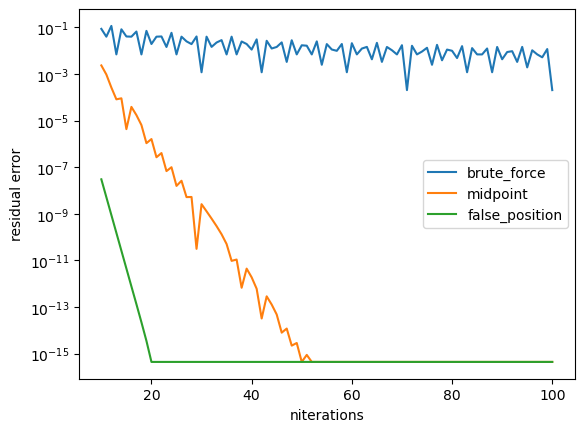

In [171]:
niterations = np.arange(10,100+1)

methods = ['brute_force', 'midpoint', 'false_position']
errors = {m: [] for m in methods}

for n in niterations:

    for m in methods:
        x    = find_root(a, b, f, method = m, niterations = n)
        errors[m] += [np.abs(f(x))]

for m in methods:
    errors[m] = np.array(errors[m])


for m in methods:
    plt.semilogy(niterations,errors[m])

plt.xlabel('niterations')
plt.ylabel('residual error')
plt.legend(methods)